# QUESTION1:
Enrigistrer les données dans un format adapté pour une lecture par la suite avec Python sachant que la première ligne du fichier correspond au noms des variables.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
covid_19=pd.read_csv('covid-senegal.csv',sep=';')

# verification :

In [32]:
covid_19.head()

,date,tests,cas,contact,importe,communautaire
0,02/03/2020,1.0,1,0,0,0
1,03/03/2020,2.0,1,0,1,0
2,04/03/2020,2.0,2,1,1,0
3,05/03/2020,NaN,0,0,0,0
4,06/03/2020,2.0,0,0,0,0


Ici on a affiché les 5 premieres lignes pour s'assurer que notre dataframe ça marche.

#  convertissons:

In [33]:
covid_19['date']=pd.to_datetime(covid_19['date'])
covid_19.head()


,date,tests,cas,contact,importe,communautaire
0,2020-02-03,1.0,1,0,0,0
1,2020-03-03,2.0,1,0,1,0
2,2020-04-03,2.0,2,1,1,0
3,2020-05-03,NaN,0,0,0,0
4,2020-06-03,2.0,0,0,0,0


Ici on a remplacé la colonne date par datetime dans notre dateframe

# verification:


In [34]:
covid_19.head()

,date,tests,cas,contact,importe,communautaire
0,2020-02-03,1.0,1,0,0,0
1,2020-03-03,2.0,1,0,1,0
2,2020-04-03,2.0,2,1,1,0
3,2020-05-03,NaN,0,0,0,0
4,2020-06-03,2.0,0,0,0,0


ici on a affiché les 5 premieres lignes pour voir si notre datetime a bien remplacé notre date dans notre dateframe.

 # supprimons:
 

In [35]:
covid_19.dropna(axis=0,inplace=True)

ici on a supprimé toutes les lignes ayant une valeur manquante.

# verification:

In [36]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           495 non-null    datetime64[ns]
 1   tests          495 non-null    float64       
 2   cas            495 non-null    int64         
 3   contact        495 non-null    int64         
 4   importe        495 non-null    int64         
 5   communautaire  495 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 27.1 KB


ici on a afiché notre les informations de notre  dateframe pour voir si les ligne manquantes sont supprimées.

# QUESTION 2:


In [37]:
covid_19['proportion']=covid_19['cas']*100/covid_19['tests']

Ici on a ajouté dans notre dateframe une nouvelle variable proportion qui représente le taux de positivité journalier.

# verification:


In [38]:
covid_19.tail()

,date,tests,cas,contact,importe,communautaire,proportion
491,2021-07-07,2388.0,356,127,0,229,14.907873
492,2021-08-07,2166.0,354,135,1,218,16.343490
493,2021-09-07,2104.0,476,215,0,261,22.623574
494,2021-10-07,2762.0,380,136,0,234,13.758146
495,2021-11-07,2715.0,529,188,0,341,19.484346


ici on a affiché les 5 premieres lignes de notre dataframe pour voir si la variable proportion c'est bien enrigistré.

# QUESTION 3: 


In [39]:
covid_19['total'] =covid_19['cas'].cumsum()

ici on a ajouté dans notre dateframe une nouvelle variable total qui représente le nombre cumulé de cas positifs du début de la pandémie jusqu’à une certaine date

# verification:


In [40]:
covid_19.tail()

,date,tests,cas,contact,importe,communautaire,proportion,total
491,2021-07-07,2388.0,356,127,0,229,14.907873,46489
492,2021-08-07,2166.0,354,135,1,218,16.343490,46843
493,2021-09-07,2104.0,476,215,0,261,22.623574,47319
494,2021-10-07,2762.0,380,136,0,234,13.758146,47699
495,2021-11-07,2715.0,529,188,0,341,19.484346,48228


ici on a affiché les 5 premieres lignes de notre dataframe pour voir si la variable total c'est bien enrigistré.

# QUESTION 4:


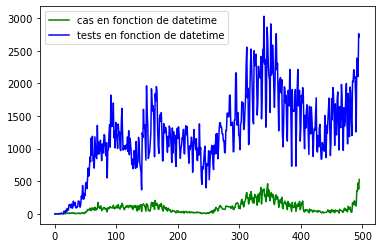

In [45]:
covid_19['cas'].plot(label='cas en fonction de datetime',c='g')
covid_19['tests'].plot(label='tests en fonction de datetime',c='b')
xlabel='date'
plt.legend()


Ici on a représenté les variables tests et cas en fonction de la datime dans le même graphique de notre dateframe et puis ajouté une légende dans le graphique.

# QUESTION 5:


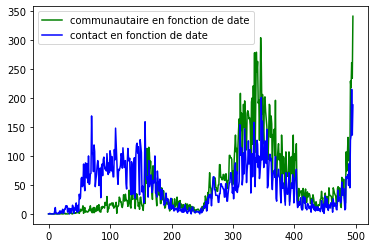

In [46]:
covid_19['communautaire'].plot(label='communautaire en fonction de date',c='g')
covid_19['contact'].plot(label='contact en fonction de date',c='b')

plt.legend()

Ici a représenté les variables communautaire et contact en fonction de la date dans le même graphique de notre dateframe et puis on a ajouté une légende dans le graphique.

# QUESTION 6:
-Traçons le boxplot et l’histogramme de la variable cas. Conclure sur la présence ou non d’éventuelles valeurs manquantes pour cette variable:

# #Traçons le boxplot: 

   *L'HISTOGRAMME

<AxesSubplot:>

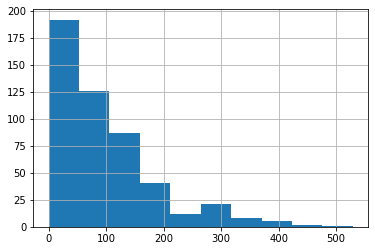

In [47]:
covid_19['cas'].hist()

Ici on a représenté l'histogramme des cas.

# QUESTION 7:
-Discrétisons la variable cas. Pour ce faire on ajoutera une variable dans le DataFrame des données une nouvelle variable nommée cas_classe. Cette variable aura 4 classes :[min(cas),Q1], ]Q1,Q2], ]Q2,Q3], ]Q3,max(cas)]:


In [48]:
def cas_groups(c):
    if (c >= np.min(covid_19['cas']) and c <= np.quantile(covid_19['cas'],0.25)):
        return "A"
    elif ( c > np.quantile(covid_19['cas'],0.25) and c <= np.quantile(covid_19['cas'],0.5) ) :
        return "B"
    elif  ( c > np.quantile(covid_19['cas'],0.5) and c <= np.quantile(covid_19['cas'],0.75) ):
        return "C"
    else :
        return "D"


covid_19['cas_classe'] = covid_19['cas'].apply(cas_groups)

In [49]:
covid_19.dtypes
covid_19.shape

covid_19['cas_classe'] = covid_19['cas_classe'].astype('category')
print(covid_19['cas_classe'])

0      A
1      A
2      A
4      A
5      A
      ..
491    D
492    D
493    D
494    D
495    D
Name: cas_classe, Length: 495, dtype: category
Categories (4, object): ['A', 'B', 'C', 'D']


# QUESTION 8:


In [50]:
pd.value_counts(covid_19['cas_classe'])

A    126
D    124
B    124
C    121
Name: cas_classe, dtype: int64

Ici on a cherché les fréquences des modalités de la nouvelle variable cas_classe.

# QUESTION 9:
 On suppose que la variables cas suit une loi binomiale négative N B(θ, p), θ > 0 et < 0 < p < 1.
Calculons les estimations de θ et p en utilisant la méthode des moments.

On suppose que la variable cas suit une loi binomiale négative NB(θ,p),donc son espérance et sa variance s'écrivent sous la forme:


    E[cas]= θ(1-p)/p            et             VAR[cas]=θ(1-p)/p^2




On peut exprimer de θ et p en fonction de E[cas] et V[cas]

#        θ=(E[cas])^2/(V[cas]-E[cas])                et                           P=E[cas]/VAR[cas]
 

D'ou,pour estimer θ et p il suffit juste de remplacer E[cas] par µ et VAR[cas] par b

In [17]:
µ=covid_19['cas'].mean()
µ

97.43030303030304

ici on a calculé l'espériance de la variable aléatoire cas.

In [18]:
b=covid_19['cas'].var()
b

7877.6707397865275

ici on a calculé la variance de la variable aléatoire cas.

In [19]:
θ=(b**2)/(b-µ)
θ

7976.321141864634

Ici on a estiimé le paramettre θ par la méthode des moments.

In [20]:
p=µ/b
p

0.012367907500655867

Ici on a estimé le paramettre de p par la méthode des moments.

# QUESTION 10:


Calculons p et θ avec la methode de maximum de vraisemblance

In [34]:
def loi_binomiale_nega(n,θ,p):
    m=np.combin([n-1,θ-1])
    return m*p**θ*(1-p)**(n-θ)

Ici on a défini la loi binomiale négative NB(θ,p),avec θ>0 et 0<p<1 par notre fonction loi_binomiale_nega

In [30]:
def vraisemblance(cas,θ,p):
    L=[]
    for x in cas:
        y=loi_binomiale_nega(x,θ,p)
        L.append(y)
    return np.prod(L)

Ici on a défini Vraisemblance cas suivant la loi binomiale négative NB(θ,p),avec θ>0 et 0<p<1 par notre fonction vraisemblance

In [28]:
def log_vraisemblance(cas,θ,p):
    l=[]
    for z in cas:
        w=loi_binomiale_nega(x,θ,p)
        l.append(np,log(w))
    return np.sum(l)

AttributeError: module 'numpy' has no attribute 'combin'

[3 1]
